In [263]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

import warnings

import csv

import datetime



warnings.filterwarnings('ignore')

pd.plotting.register_matplotlib_converters()

In [264]:
df = pd.read_csv('data2.csv', parse_dates=['Timestamp'], encoding = 'utf-16')

df.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity
0,twitter,1552760166,Mooi verhaal over windmolens https://www.insta...,Null,1.0,0.0,0.70,1.00
1,twitter,1552995709,Het mooiste happy hour was afgelopen zaterdag....,Null,0.0,0.0,0.00,0.00
2,twitter,1553001655,Dus bij jou in de achtertuin windmolensvoortui...,Null,0.0,0.0,0.00,0.00
3,twitter,1552471319,Hoe kan provincie zorgen voor bouw van genoeg ...,Null,0.0,0.0,0.20,0.50
4,twitter,1552993305,We zijn geen communistisch land. Een vliegveld...,Null,0.0,0.0,0.19,0.58


In [265]:
df['Timestamp']= pd.to_datetime(df['Timestamp'], unit='s')

df.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity
0,twitter,2019-03-16 18:16:06,Mooi verhaal over windmolens https://www.insta...,Null,1.0,0.0,0.70,1.00
1,twitter,2019-03-19 11:41:49,Het mooiste happy hour was afgelopen zaterdag....,Null,0.0,0.0,0.00,0.00
2,twitter,2019-03-19 13:20:55,Dus bij jou in de achtertuin windmolensvoortui...,Null,0.0,0.0,0.00,0.00
3,twitter,2019-03-13 10:01:59,Hoe kan provincie zorgen voor bouw van genoeg ...,Null,0.0,0.0,0.20,0.50
4,twitter,2019-03-19 11:01:45,We zijn geen communistisch land. Een vliegveld...,Null,0.0,0.0,0.19,0.58


In [266]:
# load data


3


# remove outlier record

df = df.loc[df['Timestamp'] > '2007-01-01']

# FEATURE EXTRACTION

# month, for seasonality
df['month'] = 0
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year

# days_since_first, for trend
df['days_since_first'] = 0
df['days_since_first'] = (df['Timestamp'] - min(df['Timestamp'])).dt.days



# create test design

train_filter = df['Timestamp'] < '2017-08-01'

df_train = df[train_filter]

df_test = df[(df['Timestamp'] > '2017-01-01') & (df['Timestamp'] < '2017-12-30')]

print(df_test)

      Origin           Timestamp  \
438  twitter 2018-07-29 06:30:00   
439  twitter 2018-07-28 09:50:18   
440  twitter 2018-07-27 15:19:38   
442  twitter 2018-07-26 09:43:18   
443  twitter 2018-07-24 09:34:32   
444  twitter 2018-07-23 21:14:35   
445  twitter 2018-07-23 08:17:08   
446  twitter 2018-07-21 19:44:20   
447  twitter 2018-07-21 18:29:44   
450  twitter 2018-07-17 20:07:00   
451  twitter 2018-07-17 10:06:20   
452  twitter 2018-07-15 05:17:38   
453  twitter 2018-07-14 09:17:34   
454  twitter 2018-07-13 14:36:03   
455  twitter 2018-07-12 13:24:44   
456  twitter 2018-07-11 23:49:48   
457  twitter 2018-07-11 21:19:37   
459  twitter 2018-07-10 20:49:26   
460  twitter 2018-07-10 19:03:23   
461  twitter 2018-07-10 13:53:43   
462  twitter 2018-07-08 10:38:35   
463  twitter 2018-07-06 10:56:52   
464  twitter 2018-07-05 21:27:34   
465  twitter 2018-07-05 14:16:59   
466  twitter 2018-07-04 08:35:44   
467  twitter 2018-07-03 05:30:17   
468  twitter 2018-06-26 11:0

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2732
Data columns (total 11 columns):
Origin              2569 non-null object
Timestamp           2569 non-null datetime64[ns]
Content             2569 non-null object
Title               2569 non-null object
Comment_count       2569 non-null float64
Retweet_count       2569 non-null float64
Polarity            2569 non-null float64
Subjectivity        2569 non-null float64
month               2569 non-null int64
year                2569 non-null int64
days_since_first    2569 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 240.8+ KB


In [268]:
print(df_train.count(), df_test.count())

Origin              1888
Timestamp           1888
Content             1888
Title               1888
Comment_count       1888
Retweet_count       1888
Polarity            1888
Subjectivity        1888
month               1888
year                1888
days_since_first    1888
dtype: int64 Origin              264
Timestamp           264
Content             264
Title               264
Comment_count       264
Retweet_count       264
Polarity            264
Subjectivity        264
month               264
year                264
days_since_first    264
dtype: int64


In [269]:
# select features

# one-hot-encode month, to let the linear model recognize monthly seasonality

# features = ['month']

# ohe = OneHotEncoder(categorical_features=[0])

# x_train = ohe.fit_transform(df_train[features].astype(int))

# x_test = ohe.transform(df_test[features].astype(int))



# define targets

target = 'Polarity'

y_train = df_train[target]

y_test = df_test[target]



# # fit and aply linear regression model
import numpy as np

x_train = np.column_stack((df_train['month'], df_train['Subjectivity'])).astype(int)
x_test = np.column_stack((df_test['month'], df_test['Subjectivity'])).astype(int)
y_test = df_test[target]

model = LinearRegression()

model.fit(x_train, y_train)

pred_train = model.predict(x_train)

pred_test = model.predict(x_test)

df_test['predictions'] = pred_test

df_test.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity,month,year,days_since_first,predictions
438,twitter,2018-07-29 06:30:00,De volstrekte onlogica om te denken dat duizen...,Null,8.0,13.0,0.1,0.500,7,2018,4054,0.050197
439,twitter,2018-07-28 09:50:18,Massale inzet windmolens verstoort klimaat. Do...,Null,5.0,74.0,0.2,0.550,7,2018,4053,0.050197
440,twitter,2018-07-27 15:19:38,Dolfijnen gewoon in de Noordzee rond de TX-1. ...,Null,13.0,66.0,0.0,0.700,7,2018,4053,0.050197
442,twitter,2018-07-26 09:43:18,1% van onze elektriciteit komt nu uit windmole...,Null,8.0,57.0,0.4,0.575,7,2018,4051,0.050197
443,twitter,2018-07-24 09:34:32,Verder niks aan de hand hoor jongens. Gewoon d...,Null,4.0,13.0,0.0,0.400,7,2018,4049,0.050197


In [270]:
df.corr()

,Comment_count,Retweet_count,Polarity,Subjectivity,month,year,days_since_first
Comment_count,1.000000,0.647040,-0.002840,0.072814,0.014166,0.167124,0.171918
Retweet_count,0.647040,1.000000,0.003935,0.048564,0.005847,0.190919,0.195411
Polarity,-0.002840,0.003935,1.000000,0.228086,0.019913,0.011599,0.014080
Subjectivity,0.072814,0.048564,0.228086,1.000000,-0.001238,0.152434,0.154934
month,0.014166,0.005847,0.019913,-0.001238,1.000000,-0.225061,-0.117588
year,0.167124,0.190919,0.011599,0.152434,-0.225061,1.000000,0.994013
days_since_first,0.171918,0.195411,0.014080,0.154934,-0.117588,0.994013,1.000000


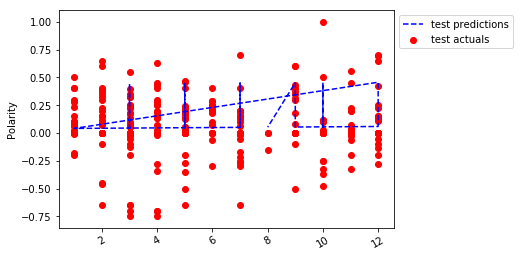

In [271]:
# plt.plot(df_train['Timestamp'], pred_train, label='train predictions', linestyle='--', color='blue')

# plt.plot(df_train['Timestamp'], y_train, label='train actuals', linestyle='-', color='blue'

plt.scatter( df_test['month'], y_test,label='test actuals', linestyle='-', color='red')

plt.plot( df_test['month'], pred_test, label='test predictions', linestyle='--', color='blue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.xticks(rotation=30)

plt.ylabel(target)

plt.show()


In [272]:
from sklearn.metrics import r2_score
model.coef_

r2_score(df_test['Polarity'], pred_test) 

-0.00029980336436219446